In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content

/content


In [3]:
rm -rf darknet

In [4]:
!git clone https://github.com/okboseong/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 3499, done.
remote: Total 3499 (delta 0), reused 0 (delta 0), pack-reused 3499
Receiving objects: 100% (3499/3499), 56.20 MiB | 14.30 MiB/s, done.
Resolving deltas: 100% (424/424), done.


In [5]:
!nvcc --version
print("===============================================================================")
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Mon Sep  7 01:31:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [6]:
cd darknet

/content/darknet


In [7]:
ls -al

total 684
drwxr-xr-x 16 root root   4096 Sep  7 01:31 ./
drwxr-xr-x  1 root root   4096 Sep  7 01:31 ../
drwxr-xr-x  4 root root   4096 Sep  7 01:31 3rdparty/
drwxr-xr-x  3 root root   4096 Sep  7 01:31 build/
-rwxr-xr-x  1 root root   8453 Sep  7 01:31 build.ps1*
drwxr-xr-x  3 root root   4096 Sep  7 01:31 build_release/
-rwxr-xr-x  1 root root   2044 Sep  7 01:31 build.sh*
drwxr-xr-x  3 root root   4096 Sep  7 01:31 cfg/
-rw-r--r--  1 root root  88492 Sep  7 01:31 chart.png
-rw-r--r--  1 root root  88492 Sep  7 01:31 chart_yolov4train.png
drwxr-xr-x  2 root root   4096 Sep  7 01:31 .circleci/
drwxr-xr-x  3 root root   4096 Sep  7 01:31 cmake/
-rw-r--r--  1 root root  21066 Sep  7 01:31 CMakeLists.txt
-rw-r--r--  1 root root   1363 Sep  7 01:31 DarknetConfig.cmake.in
-rw-r--r--  1 root root   8738 Sep  7 01:31 darknet_images.py
-rw-r--r--  1 root root  10334 Sep  7 01:31 darknet.py
-rw-r--r--  1 root root   5274 Sep  7 01:31 darknet_video.py
drwxr-xr-x  3 root root   4096 Sep  7 01:31

In [ ]:
!./build.sh

In [29]:
cd /content/drive/My\ Drive/YOLO/weight

/content/drive/My Drive/YOLO/weight


In [30]:
ls

darknet53.conv.74         yolov4train_2000.weights   yolov4train_last.weights
yolov3_900.weights        yolov4train_best.weights
yolov4train_1000.weights  yolov4train_final.weights


In [32]:
# cp yolov4train_best.weights /content/darknet/build/darknet/x64/backup
!cp yolov4train_best.weights /content/darknet/

In [19]:
cd /content/drive/My\ Drive/YOLO/

/content/drive/My Drive/YOLO


In [20]:
ls

 20.08.25/          browser-photos/  'img data'/        weightwith1000img
 20.09.01/          darknet/          temp_img/         yolov4.conv.137
 alexyab/           darknet.zip       weight/
 alexyab_darknet/   hand.mp4          weight_1000img/


In [21]:
cp  yolov4.conv.137 /content/darknet

In [33]:
cd /content/darknet

/content/darknet


In [ ]:
!./darknet detector train build/darknet/x64/data/obj.data build/darknet/x64/cfg/yolov4train.cfg yolov4.conv.137 -gpu 1 -dont_show -map flag 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x 

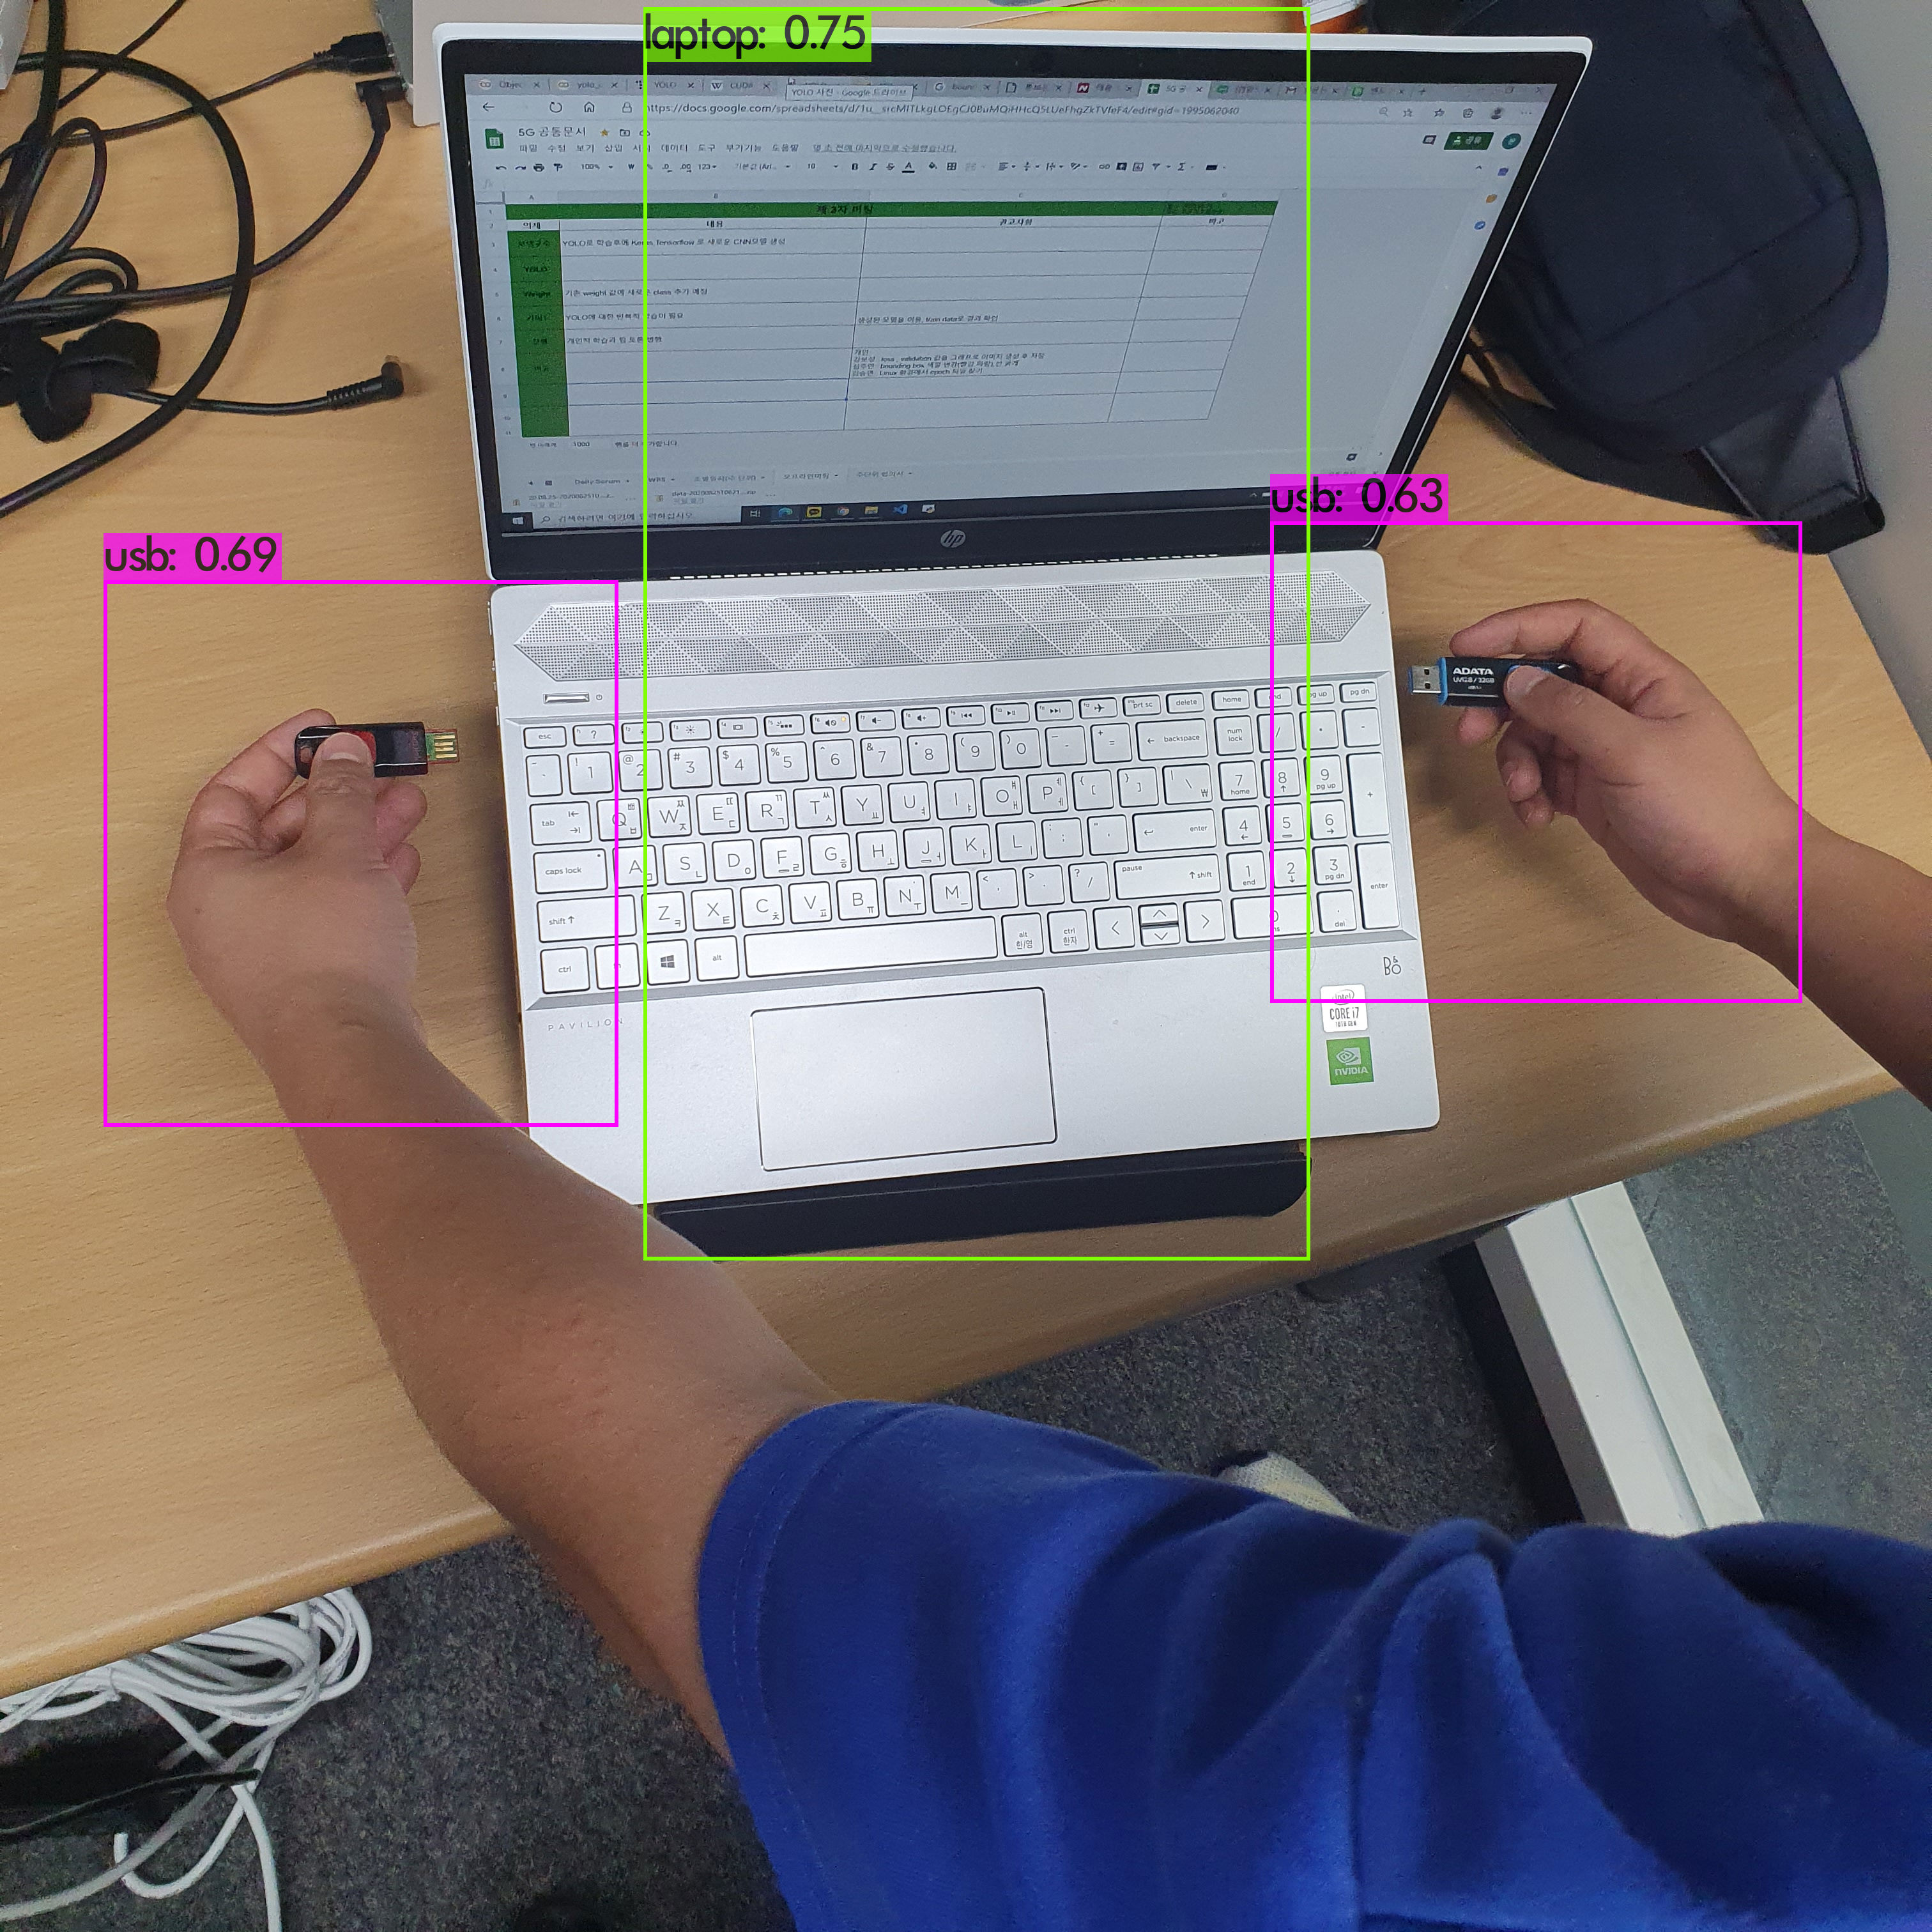

In [43]:
!./darknet detector test build/darknet/x64/data/obj.data build/darknet/x64/cfg/yolov4train.cfg build/darknet/x64/backup/yolov4train_best.weights bothhand.jpg
#!./darknet detector test cfg/obj.data cfg/yolov3.cfg backup/yolov3_900.weights data/img/234.jpg
from IPython.display import Image
Image('predictions.jpg')


In [83]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [85]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

'NoneType' object has no attribute 'split'
